In [1]:
# import the library
import pandas as pd

In [2]:
# Import the dataset
data = pd.read_csv('datasets/heart_disease.csv')

In [3]:
# taking care of missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# taking care of duplicate values
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

False

## Data Processing

In [10]:
cate_val =[]
cont_val =[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## encoding categorical data

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## train_test_split

In [20]:
X = data.drop('target',axis=1)
y = data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(302, 22) (241, 22) (61, 22)


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [26]:
prediction
y_pred1 = logreg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

## SVC

In [29]:
from sklearn import svm

In [30]:
support_vector = svm.SVC()

In [31]:
support_vector.fit(X_train,y_train)

SVC()

In [32]:
y_pred2 = support_vector.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

## KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3 = knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [40]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [41]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

## Non Linear ML Algorithms

In [42]:
data = pd.read_csv('datasets/heart_disease.csv')

In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(302, 14)

In [45]:
X = data.drop('target',axis=1)
y=data['target']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred4= dt.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred5 = rf.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train) 

GradientBoostingClassifier()

In [61]:
y_pred6=gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [62]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [63]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.852459
5,GB,0.803279


In [64]:
import seaborn as sns

C:\Users\sanjeetRai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

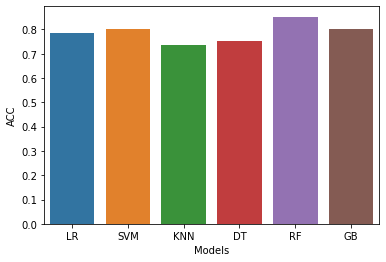

In [65]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [66]:
X = data.drop('target',axis=1)
y=data['target']

In [67]:
X.shape

(302, 13)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

## prediction on new data

In [70]:
import pandas as pd

In [71]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':201,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
    },index=[0])

In [72]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,201,0,1,168,0,1.0,2,2,3


In [74]:
p=rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')
    

No Disease


## Save Model Using Joblib

In [75]:
import joblib

In [76]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [77]:
model=joblib.load('model_joblib_heart')

In [78]:
model.predict(new_data)

array([0], dtype=int64)